# Giovanni & Oscar | ML Final Project | Milestone 2

Setup and Baseline, Due 3/30

## Points (10 pts)
## Tasks:

1. Load the data in a colab notebook

1. Split the training data into 90% for training and 10% for validation (your experiments).

  - **Note:** You will want to run experiments in your colab notebook without always submitting your test predictions to kaggle.

1. Figure out how to submit a baseline system to kaggle that makes predictions on the test data. You should receive a score back from kaggle and see your position on the leaderboard.

1. Submit a copy of your colab in Classroom that includes your baseline score evaluated on

  - your validation data and
  - on the official leaderboard.

### 0. Setup Dependencies

In [ ]:
# Ensure that we have the newest version of pip installed
%pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Install necessary libraries
%pip install -v numpy
%pip install -v pandas
%pip install -v matplotlib
%pip install -v seaborn

# Helps avoid showing plots in a separate line
# %matplotlib inline

# %pip install -v scikit-learn

Using pip 23.0.1 from /usr/local/lib/python3.9/dist-packages/pip (python 3.9)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Using pip 23.0.1 from /usr/local/lib/python3.9/dist-packages/pip (python 3.9)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Using pip 23.0.1 from /usr/local/lib/python3.9/dist-packages/pip (python 3.9)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Using pip 23.0.1 from /usr/local/lib/python3.9/dist-packages/pip (python 3.9)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import the modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import datasets

# Set the styling of the plt plots to darkgrid
sns.set(style='darkgrid')

# Removes error messsages and sets precision to 3 decimal places
# import warnings
# warnings.filterwarnings('ignore')
# np.set_printoptions(precision=3, suppress=True)

### 1. Load the Data in a Colab Notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


# Please update the Path here to the location of your train.csv and test.csv files
path_to_csv = '/content/drive/MyDrive/Final_Project_Oscar_Giovanni'

# Load the Data Frames from the Training and Testing Data Frame
train_df = pd.read_csv(f'{path_to_csv}/train.csv')
test_df = pd.read_csv(f'{path_to_csv}/test.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Verifying that the Train Data Frame is loaded in properly
display(train_df)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [ ]:
# Reformat the single training dataframe to input and output dataframes
input_names = ['id', 'keyword', 'location', 'text']
input_df = train_df[input_names]
print('Input Data Frame:')
display(input_df.head())

output_names = ['target']
output_df = train_df[output_names]
print('Output Data Frame:')
display(output_df.head())

Input Data Frame:


,id,keyword,location,text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...


Output Data Frame:


,target
0,1
1,1
2,1
3,1
4,1


In [ ]:
# Convert the train dataframes into numpy arrays for easier use in our model
X_data = input_df.to_numpy()
Y_data = output_df.to_numpy().flatten()   # Change dim from (n, 1) to (1,)

# Show sample data from the train data
print(X_data[:5])
print(Y_data[:5])

print(X_data.shape)
print(Y_data.shape)

[[1 nan nan
  'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all']
 [4 nan nan 'Forest fire near La Ronge Sask. Canada']
 [5 nan nan
  "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"]
 [6 nan nan
  '13,000 people receive #wildfires evacuation orders in California ']
 [7 nan nan
  'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ']]
[1 1 1 1 1]
(7613, 4)
(7613,)


### 2. Split the training data into 90% training and 10% for validation (your experiments)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into train and test using sklearn
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, train_size=0.90)

In [ ]:
# Print first two training examples
for index in range(2):
  print('Text')
  print(X_train[index])
  print()
  
  print('Is Natural Disaster?')
  print(Y_train[index], 'Yes' if Y_train[index] == 1 else 'No')
  print('======================')
  print()

Text
[6839 'loud%20bang' nan
 '@Bang_Me_Up_Guk he was ;-; like he was singing so loud ;-;']

Is Natural Disaster?
0 No

Text
[3816 'detonate' 'Ottawa,Ontario Canada'
 'Real Hip Hop: Apollo Brown Feat M.O.P. - Detonate \n#JTW http://t.co/cEiaO1TEXr']

Is Natural Disaster?
0 No



### 3. Testing and Submitting a Baseline

In [ ]:
# Returns a positive result, regardless of the input
def baseline_model(text_inputs):
  return 1

# Modify the function for numpy arrays
baseline_model_np = np.vectorize(baseline_model, signature='(n) -> ()')

In [ ]:
# Predict on the train portion of the train.csv data
baseline_predictions_train = baseline_model_np(X_train)

# Print out the first 5 training inputs
# and their labels alongside their predictions
for i in range(5):
  print('Input:')
  print(X_train[i])
  print()

  print('Output')
  print(Y_train[i])
  print()

  print('Prediction')
  print(baseline_predictions_train[i])
  print('==================')
  print()

Input:
[6839 'loud%20bang' nan
 '@Bang_Me_Up_Guk he was ;-; like he was singing so loud ;-;']

Output
0

Prediction
1

Input:
[3816 'detonate' 'Ottawa,Ontario Canada'
 'Real Hip Hop: Apollo Brown Feat M.O.P. - Detonate \n#JTW http://t.co/cEiaO1TEXr']

Output
0

Prediction
1

Input:
[1699 'bridge%20collapse' 'US'
 'Two giant cranes holding a bridge collapse into nearby homes http://t.co/jBJRg3eP1Q']

Output
1

Prediction
1

Input:
[9226 'suicide%20bombing' 'Australia'
 "Erdogan's Bloody Gambit: on July 20 a suicide bombing in Turkey took the lives of 31 socialists in SuruÌ¤ http://t.co/z6xAUIDRXu @Shareaholic"]

Output
1

Prediction
1

Input:
[8356 'ruin' 'Garrett'
 "like why on earth would you want anybody to be unhappy don't purposely ruin somebody else's happiness"]

Output
0

Prediction
1



In [ ]:
# Calculates Log Loss
def calculate_loss(labels, predictions):
  epsilon = 0.000001  # Prevents taking the natural log of non-positive values
  ce_values = -labels * np.log(predictions + epsilon) - (1 - labels) * np.log(1 - predictions + epsilon)
  loss = ce_values.mean()
  return loss

In [ ]:
training_loss = calculate_loss(Y_train, baseline_predictions_train)
print('Training Loss:', training_loss)

Training Loss: 7.90293138879922


In [ ]:
# Run on the validation data
baseline_predictions_test = baseline_model_np(X_test)
testing_loss = calculate_loss(Y_test, baseline_predictions_test)
print('Testing Loss:', testing_loss)

Testing Loss: 7.669239668004012


### 4. Submission

In [ ]:
# Create the submission CSV file for our Kaggle submission
def save_to_submissions_csv(text_inputs, prediction_labels):
  print('Generating "submission.csv" file...')
  # Extract the ids of the text inputs and flatten to a 1D ndarray
  test_ids = text_inputs[:,0].flatten()

  # Write the submission file and save to 'submission.csv'
  np.savetxt(
    'submission.csv',
    np.rec.fromarrays([test_ids, prediction_labels]),
    fmt=['%s', '%d'],
    delimiter=',',
    header='id,target',
    comments=''
  )
  print('Successfully created "submission.csv"')

In [ ]:
# Reformat the single training dataframe to an input dataframe
input_names = ['id', 'keyword', 'location', 'text']
test_input_df = test_df[input_names]

# Reformat the input dataframe into a numpy array for running through our model
test_input_np = test_input_df.to_numpy()

# Predict by using the baseline model on the test input and save to a .csv
baseline_predictions_test = baseline_model_np(test_input_np)
save_to_submissions_csv(test_input_np, baseline_predictions_test)

Generating "submission.csv" file...
Successfully created "submission.csv"


In [ ]:
# Look at the first few predictions to ensure things went smoothly
!head submission.csv

id,target
0,1
2,1
3,1
9,1
11,1
12,1
21,1
22,1
27,1


### Validation score and leaderboard rankings
It's last place but its honest work :'(

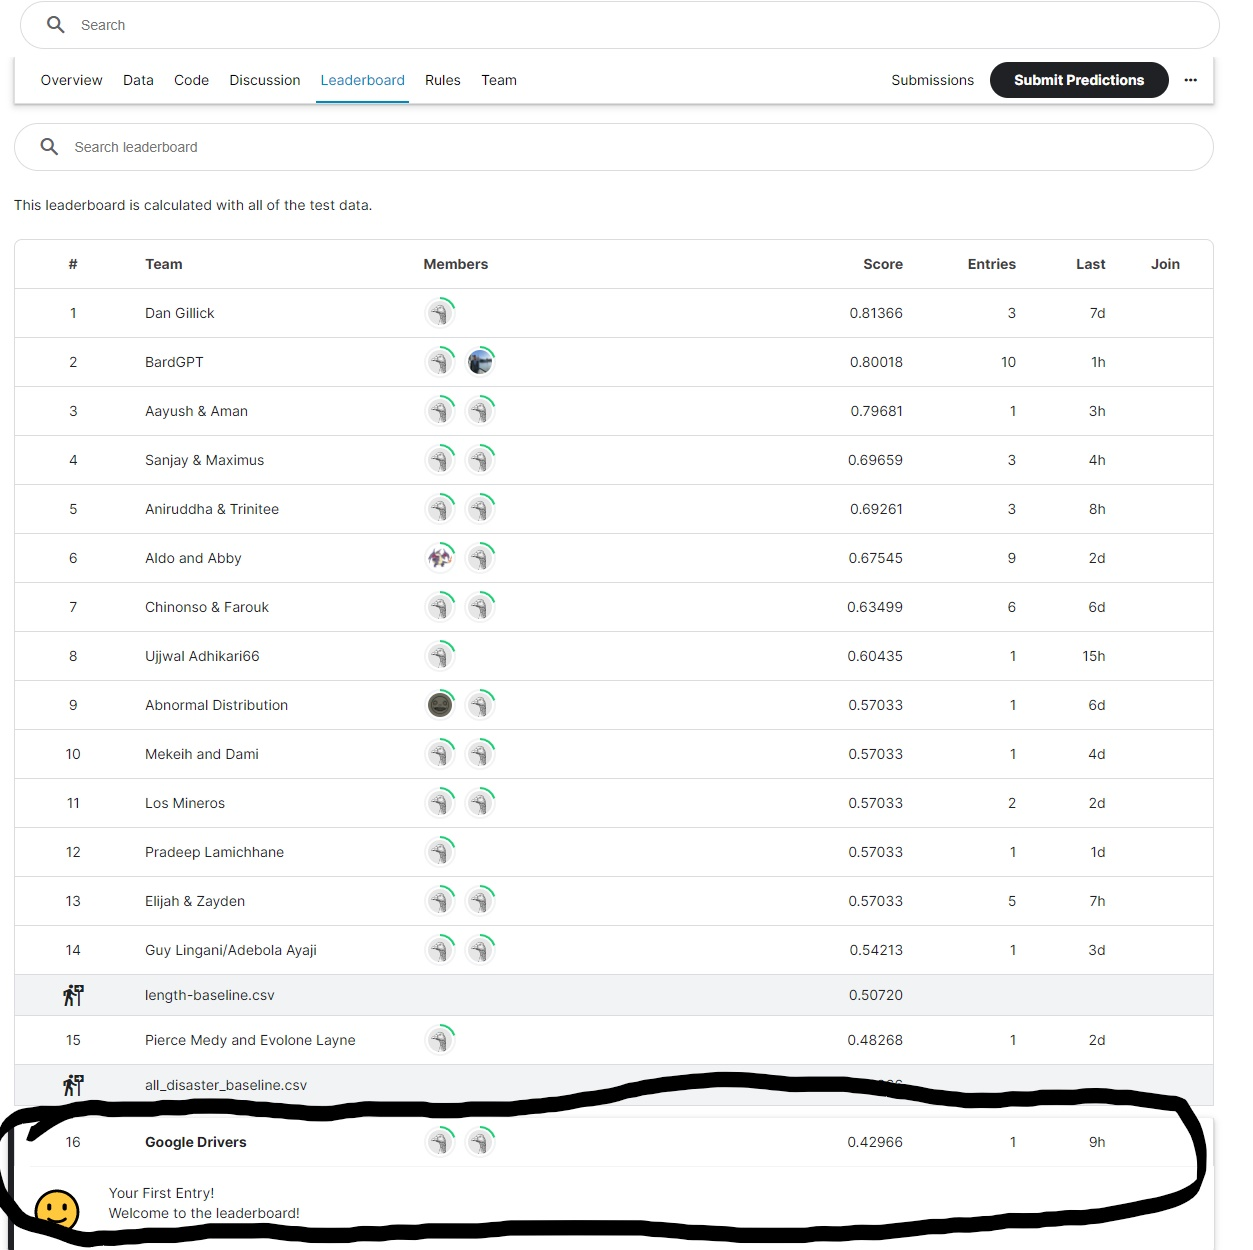